In [1]:
import cvxpy as cvx
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, LabelBinarizer, StandardScaler 

data=pd.read_csv("/Users/ash/Downloads/train.csv")


def preprocess_num(data):
    num_cova=data.select_dtypes(exclude='object')
    pipe_num=Pipeline([
        ('imputer', Imputer(strategy='mean')),
        ('fscaling',StandardScaler()),
    ])
    cleaned=pd.DataFrame(pipe_num.fit_transform(data[list(num_cova)]),columns=list(num_cova))
    pd.DataFrame(cleaned,columns=list(num_cova))
    return pd.DataFrame(cleaned)

data=preprocess_num(data)

def split_train_test(data, test_ratio=0.2):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

data_train,data_test=split_train_test(data)

Predict_train=data_train['SalePrice']
Var_train=data_train.drop(['SalePrice','Id'],axis=1)
Predict_test=data_test['SalePrice']
Var_test=data_test.drop(['SalePrice','Id'],axis=1)

colnames=Var_train.columns.values

In [6]:
#Pure Ridge
import matplotlib.pyplot as plt
import math

Var_train=np.matrix(Var_train)
Predict_train=np.matrix(Predict_train)
K=Var_train.shape[1]
N=Var_train.shape[0]
ones=np.ones(N)
Q=np.column_stack((Var_train,ones))
coef=cvx.Variable(K+1,1)
r=cvx.Parameter(sign='positive')
obj=cvx.Minimize(cvx.norm(Q*coef-Predict_train.transpose())+r*cvx.sum_entries(coef[0:K]**2,axis=0))
constraints=[]
prob=cvx.Problem(obj,constraints)

def test(coefs,Var_test=Var_test, Predict_test=Predict_test):
    N=Var_test.shape[0]
    Var_test=np.matrix(Var_test)
    ones=np.ones(N)
    Var_test=np.column_stack((Var_test,ones))
    Predict_test=np.matrix(Predict_test)
    cost=math.sqrt((Var_test*coefs-Predict_test.transpose()).transpose()*(Var_test*coefs-Predict_test.transpose()))
    return cost

lam=np.arange(0,200,1)
coefs=[]
for i in lam: 
    r.value=i
    prob.solve()
    coefs.append(coef.value)  

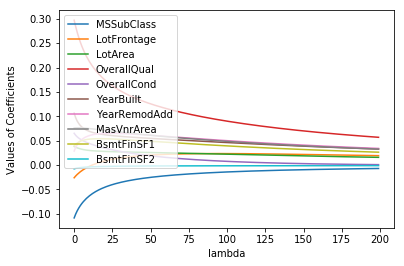

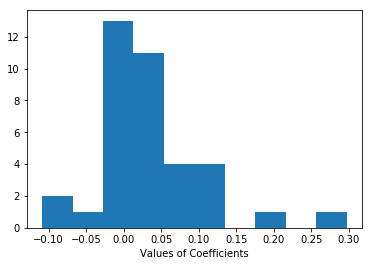

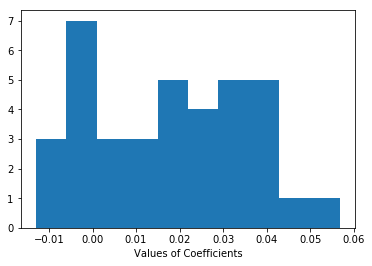

In [10]:
for _ in range(10):     
    a=plt.figure(1)
    plt.plot(np.arange(0,200,1),[float(coefs[j][_]) for j in range(200)],label=colnames[_])
    plt.xlabel('lambda')
    plt.ylabel('Values of Coefficients')
    plt.legend(loc=0)
    
x=plt.figure(2)
plt.hist(coefs[0])
plt.xlabel('Values of Coefficients')

y=plt.figure(3)
plt.hist(coefs[199])
plt.xlabel('Values of Coefficients')
plt.show()

In [13]:
#Pure Lasso
import matplotlib.pyplot as plt
import math


Var_train=np.matrix(Var_train)
Predict_train=np.matrix(Predict_train)
K=Var_train.shape[1]
N=Var_train.shape[0]
ones=np.ones(N)
Q=np.column_stack((Var_train,ones))
coef=cvx.Variable(K+1,1)
r=cvx.Parameter(sign='positive')
obj=cvx.Minimize(cvx.norm(Q*coef-Predict_train.transpose())+r*cvx.norm(coef[0:K],1))
constraints=[]
prob=cvx.Problem(obj,constraints)

lam=np.arange(0,50,1)
coefs=[]
error=[]
norm1=[]
for i in lam: 
    r.value=i
    prob.solve()
    coefs.append(coef.value)
    error.append(cvx.norm(Q*coef-Predict_train.transpose()).value)
    norm1.append(cvx.norm(coef[0:K],1).value)

    

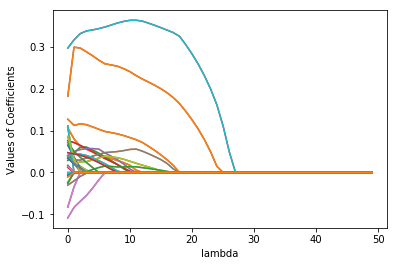

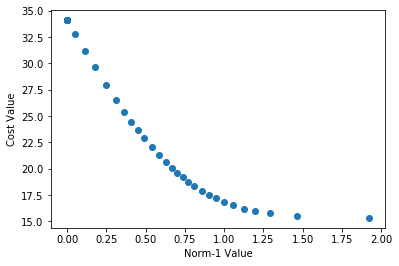

In [16]:
for _ in range(36):     
    a=plt.figure(1)
    plt.plot(np.arange(0,50,1),[float(coefs[j][_]) for j in range(50)],label=colnames[_])
    plt.xlabel('lambda')
    plt.ylabel('Values of Coefficients')
    
g=plt.figure(2)
plt.scatter(norm1,error) 
plt.xlabel('Norm-1 Value')
plt.ylabel('Cost Value')
plt.show()

In [17]:
#Infinity lasso
import matplotlib.pyplot as plt
import math


Var_train=np.matrix(Var_train)
Predict_train=np.matrix(Predict_train)
K=Var_train.shape[1]
N=Var_train.shape[0]
ones=np.ones(N)
Q=np.column_stack((Var_train,ones))
coef=cvx.Variable(K+1,1)
r=cvx.Parameter(sign='positive')
obj=cvx.Minimize(cvx.norm(Q*coef-Predict_train.transpose())+r*cvx.norm(coef[0:K],'inf'))
constraints=[]
prob=cvx.Problem(obj,constraints)

lam=np.arange(0,100,1)
coefs=[]
error=[]
norm1=[]
for i in lam: 
    r.value=i
    prob.solve()
    coefs.append(coef.value)
    error.append(cvx.norm(Q*coef-Predict_train.transpose()).value)
    norm1.append(cvx.norm(coef[0:K],'inf').value)

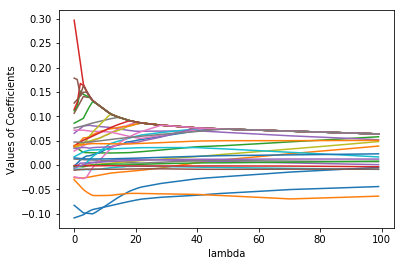

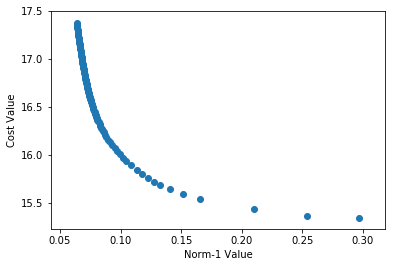

In [19]:
for _ in range(36):     
    a=plt.figure(1)
    plt.plot(np.arange(0,100,1),[float(coefs[j][_]) for j in range(100)],label=colnames[_])
    plt.xlabel('lambda')
    plt.ylabel('Values of Coefficients')
    
g=plt.figure(2)
plt.scatter(norm1,error) 
plt.xlabel('Norm-1 Value')
plt.ylabel('Cost Value')
plt.show()

In [20]:
#L-1 objective and lasso

import matplotlib.pyplot as plt
import math


Var_train=np.matrix(Var_train)
Predict_train=np.matrix(Predict_train)
K=Var_train.shape[1]
N=Var_train.shape[0]
ones=np.ones(N)
Q=np.column_stack((Var_train,ones))
coef=cvx.Variable(K+1,1)
r=cvx.Parameter(sign='positive')
obj=cvx.Minimize(cvx.norm(Q*coef-Predict_train.transpose(),1)+r*cvx.norm(coef[0:K],1))
constraints=[]
prob=cvx.Problem(obj,constraints)

lam=np.arange(0,100,1)
coefs=[]
error=[]
norm1=[]
for i in lam: 
    r.value=i
    prob.solve()
    coefs.append(coef.value)
    error.append(cvx.norm(Q*coef-Predict_train.transpose(),1).value)
    norm1.append(cvx.norm(coef[0:K],1).value)

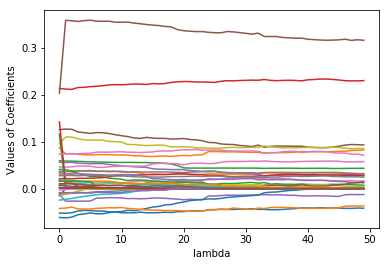

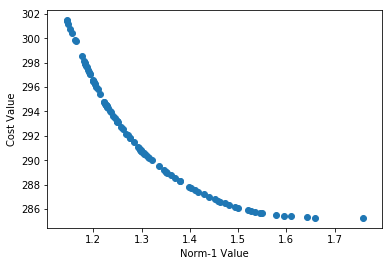

In [21]:
for _ in range(36):     
    a=plt.figure(1)
    plt.plot(np.arange(0,50,1),[float(coefs[j][_]) for j in range(50)],label=colnames[_])
    plt.xlabel('lambda')
    plt.ylabel('Values of Coefficients')
    
g=plt.figure(2)
plt.scatter(norm1,error) 
plt.xlabel('Norm-1 Value')
plt.ylabel('Cost Value')
plt.show()

In [31]:
#L-inf objective and lasso
import matplotlib.pyplot as plt
import math


Var_train=np.matrix(Var_train)
Predict_train=np.matrix(Predict_train)
K=Var_train.shape[1]
N=Var_train.shape[0]
ones=np.ones(N)
Q=np.column_stack((Var_train,ones))
coef=cvx.Variable(K+1,1)
r=cvx.Parameter(sign='positive')
obj=cvx.Minimize(cvx.norm(Q*coef-Predict_train.transpose(),'inf')+r*cvx.norm(coef[0:K],1))
constraints=[]
prob=cvx.Problem(obj,constraints)

lam=np.arange(0,100,1)
coefs=[]
error=[]
norm1=[]
for i in lam: 
    r.value=i
    prob.solve()
    coefs.append(coef.value)
    error.append(cvx.norm(Q*coef-Predict_train.transpose(),'inf').value)
    norm1.append(cvx.norm(coef[0:K],1).value)
    


[5.5462652392259466, 0.59203943014090354, 0.18637297151428686, 0.18637297157301799, 5.6210087088818913e-09, 1.5724202491104765e-10, 5.1892543844189849e-12, 1.3867497190974746e-10, 5.328575815360552e-12, 6.0552195902418034e-11, 3.3183470717939039e-12, 2.7916720954218073e-12, 5.1595785557994591e-11, 7.0991876520310476e-11, 5.0948292814238298e-11, 7.5550633897187865e-11, 1.0313957447177349e-11, 1.733203383508285e-11, 7.9020337904789567e-12, 1.0975177859489471e-10, 2.2180996672565603e-11, 9.4684672476773297e-13, 9.7443051700828763e-13, 9.1716055055145261e-13, 3.2590951230179534e-12, 9.8854614709895245e-13, 1.1370850491021885e-12, 9.6972412661993467e-13, 9.2191174860745705e-13, 8.0333270973278522e-13, 6.7767805617518558e-13, 6.5667468290213711e-13, 7.5130805860419434e-13, 8.0404271613793269e-13, 8.4704968661776677e-13, 9.2230847713856426e-13, 5.7319545632003839e-12, 2.6387800479388106e-11, 1.8065420460764596e-11, 1.891365687476154e-11, 2.6935747423894072e-11, 1.300667658434214e-11, 1.037892

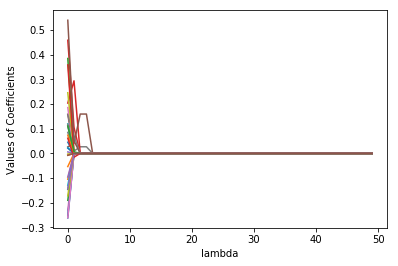

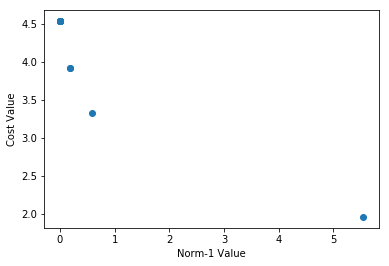

In [33]:

for _ in range(36):     
    a=plt.figure(1)
    plt.plot(np.arange(0,50,1),[float(coefs[j][_]) for j in range(50)],label=colnames[_])
    plt.xlabel('lambda')
    plt.ylabel('Values of Coefficients')
    
g=plt.figure(2)
plt.scatter(norm1,error) 
plt.xlabel('Norm-1 Value')
plt.ylabel('Cost Value')
plt.show()